<center>

# ✨ Olá! Bem vindos ao Pandora Flow ✨

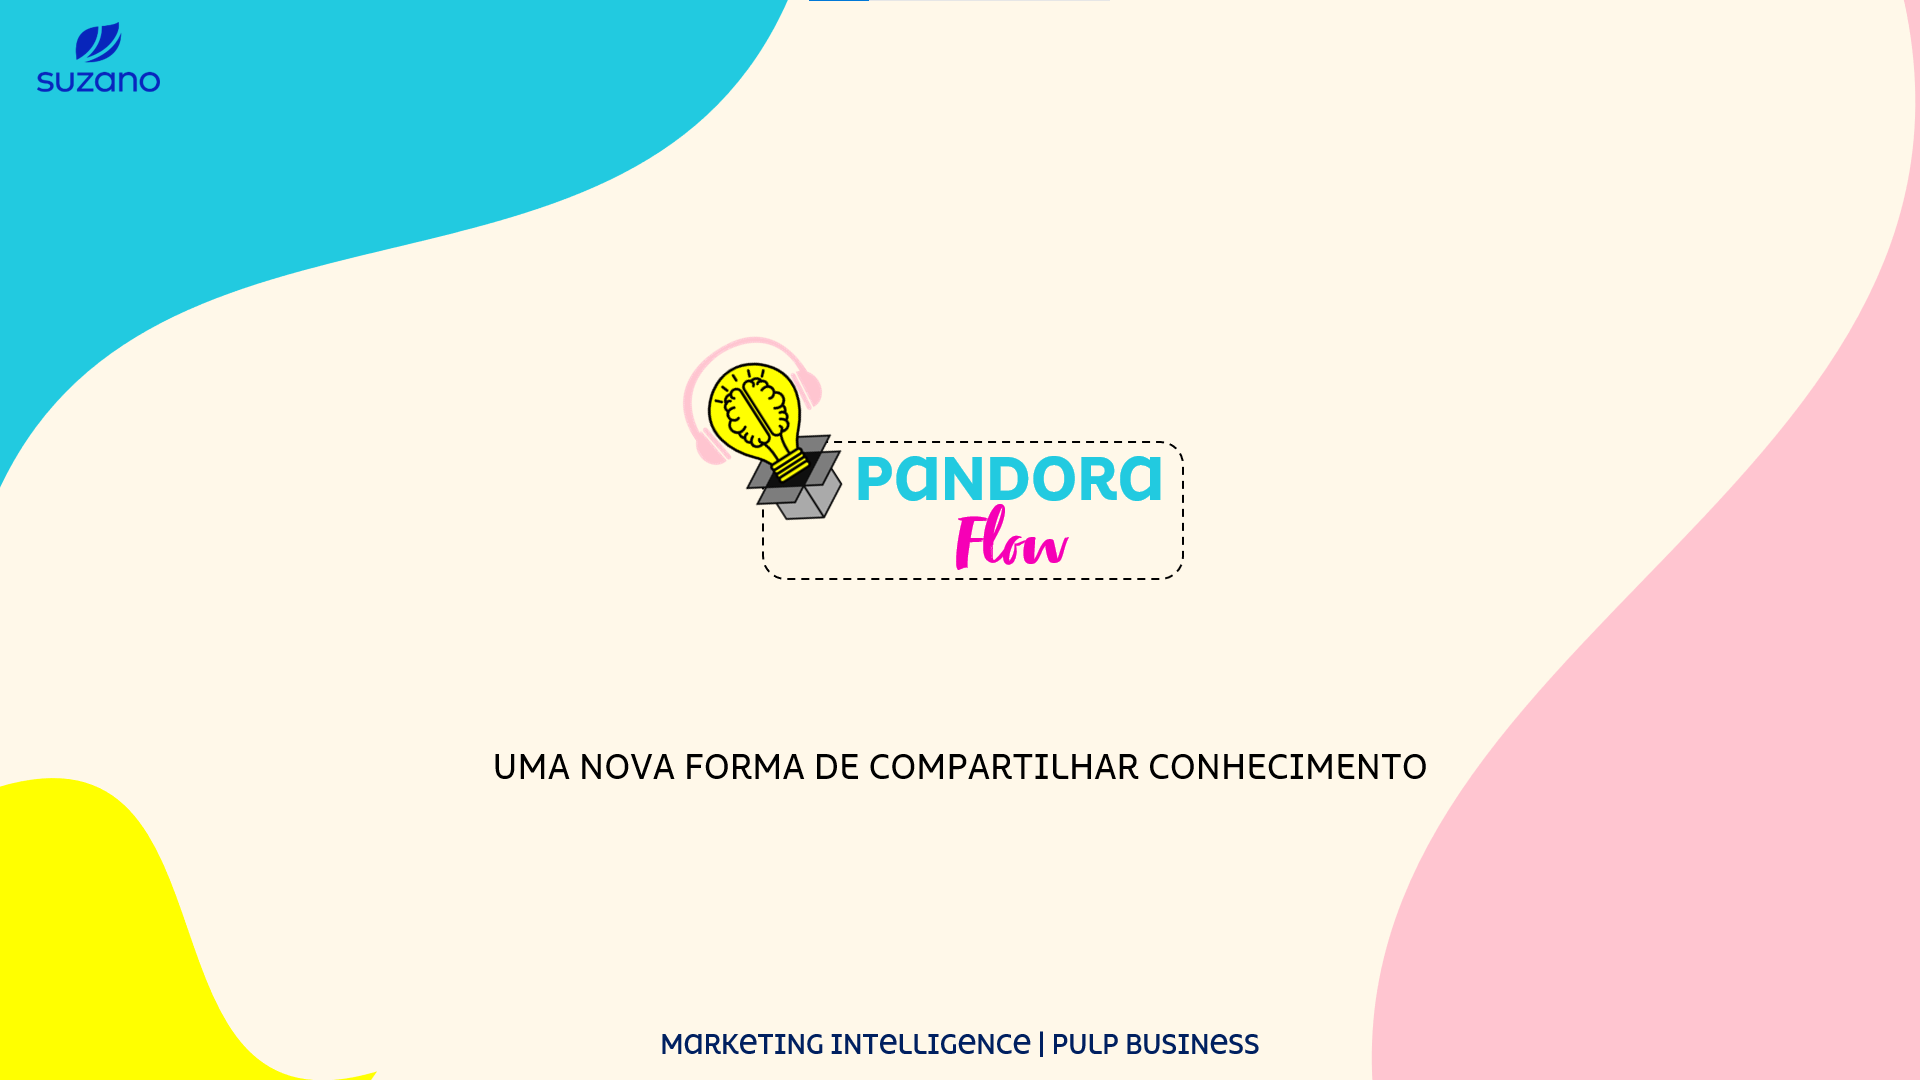
</center>

<center>

# O que é Processamento de Linguagem Natural? 

---

O Processamento de Linguagem Natural (PLN) é um ramo da inteligência artificial que fornece aos computadores a capacidade de ler, entender e extrair significado da linguagem humana (também chamada de linguagem natural).

O PNL combina linguística e ciência da computação para decodificar a estrutura da linguagem, permitindo a criação de programas e modelos que possam traduzir textos, responder a comandos falados e escritos, além de resumir grandes quantidades de texto rapidamente, mesmo em tempo real.



---

</center>

<center>

# E o tema de hoje será ... 🥁

</center>

<center>

# Classificador de heterônimos de **Fernando Pessoa** 

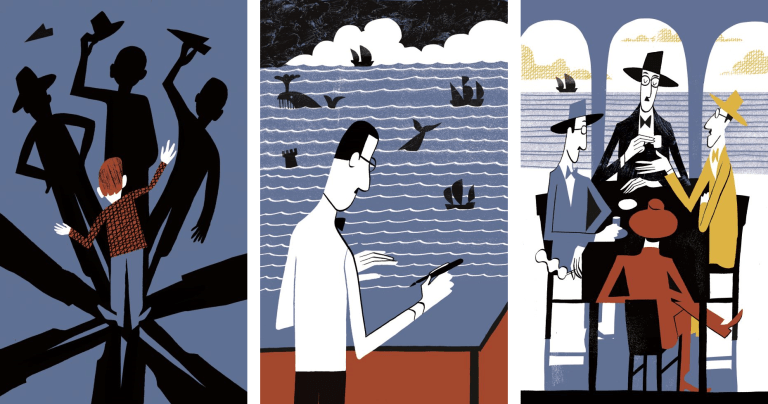

</center>

<center>


---

Fernando Pessoa (1888-1935) foi um poeta e escritor português, considerado uma das maiores figuras da literatura portuguesa e mundial. Ele é conhecido por sua poesia modernista, inovadora e altamente reflexiva, além de sua prosa experimental e filosófica.

Pessoa escreveu sua obra em várias línguas, incluindo português, inglês e francês, e criou uma série de heterônimos - personagens fictícios com personalidades distintas, estilos de escrita e até mesmo biografias próprias.

Entre os heterônimos mais conhecidos de Pessoa estão Alberto Caeiro, Álvaro de Campos, Bernardo Soares e Ricardo Reis, cada um com seu próprio estilo e visão de mundo. A obra de Pessoa inclui poesia lírica, reflexiva e filosófica, além de ensaios, contos e críticas literárias.



---


</center>

<center>

# **Características 👓**

**Alberto Caeiro** é um poeta que valoriza a simplicidade e a natureza, enfatizando a importância de viver no presente e de experimentar o mundo através dos sentidos.

**Álvaro de Campos** é um poeta modernista que expressa angústia e desorientação diante do mundo em rápida transformação, explorando temas como a tecnologia, a cidade e a máquina.

**Bernardo Soares** é um semi-heterônimo que representa um alter ego do próprio Fernando Pessoa, um escritor introspectivo e melancólico que reflete sobre a vida, a morte e a condição humana.

**Ricardo Reis** é um poeta classicista que segue as tradições da poesia greco-latina, valorizando a razão, a serenidade e a busca pelo equilíbrio emocional.

</center>

<center>

## Agora um tantinho de código ⚡

</center>



# **Parte 1:** Fazendo um breve discovery dos dados 



In [ ]:
!python -m spacy download pt_core_news_sm

In [ ]:
pip install spacy spacy-language-detection

In [3]:
import pandas as pd

fernando_pessoa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fernando_pessoa.csv')
fernando_pessoa.drop(['id', 'titulo', 'data', 'bibliografia'], inplace=True, axis=1)
fernando_pessoa.reset_index(drop=True, inplace=True)
fernando_pessoa = fernando_pessoa.groupby('autor').filter(lambda x : (x['autor'].count()>=80).any())

In [4]:
fernando_pessoa

,autor,tipo,texto
0,Ricardo Reis,poesia,Diana através dos ramos\nEspreita a vinda de E...
1,Fernando Pessoa,prosa,A REFORMA DO CALENDÁRIO E AS SUAS CONSEQUÊNCIA...
2,Fernando Pessoa,prosa,The Infinite is then the Possible.\nHow does t...
3,Ricardo Reis,poesia,"Aqui, sem outro Apolo do que Apolo,\nSem um su..."
4,Fernando Pessoa,prosa,"If evolution is to be universally true, itself..."
...,...,...,...
4525,Fernando Pessoa,poesia,Vai redonda e alta\nA lua. Que dor\nÉ em mim u...
4526,Fernando Pessoa,poesia,Saber? Que sei eu?\nPensar é descrer.\n— Leve ...
4527,Fernando Pessoa,poesia,Sopra de mais o vento\nPara eu poder descansar...
4528,Fernando Pessoa,poesia,Chove?... Nenhuma chuva cai...\nEntão onde é q...


In [5]:
# Conta quantos poemas e prosas há de cada um dos heterônimos e do próprio Pessoa no dataset

fernando_pessoa.autor.value_counts()

Fernando Pessoa     2814
Bernardo Soares      504
Álvaro de Campos     397
Ricardo Reis         307
Alexander Search     139
Alberto Caeiro       127
António Mora          95
Name: autor, dtype: int64

In [6]:
exemplo = fernando_pessoa.loc[3, 'texto']
autor = fernando_pessoa.loc[3, 'autor']
print(autor + '\n')
print(exemplo)

Ricardo Reis

Aqui, sem outro Apolo do que Apolo,
Sem um suspiro abandonemos Cristo
E a febre de buscarmos
Um deus dos dualismos.
  
E longe da cristã sensualidade
Que a casta calma da beleza antiga
Nos restitua o antigo
Sentimento da vida.


<center>

# Sobre o **Ricardo Reis** ... 

</center>

<center>



---



A obra de Ricardo Reis é marcada por temas como a fugacidade da vida, a 
efemeridade do tempo e a natureza. O poeta apresenta uma visão estoica e filosófica da vida, em que a serenidade, a sabedoria e a aceitação das limitações humanas são valores fundamentais.

A poesia de Ricardo Reis é, portanto, uma espécie de exercício estético e filosófico, em que a busca pela perfeição formal é combinada com uma reflexão sobre o sentido da existência humana.



---


</center>

# **1.1** Identificando os diferentes idiomas e selecionando os textos em língua portuguesa

In [ ]:
import spacy
from spacy.language import Language

from spacy_language_detection import LanguageDetector

def get_lang_detector(nlp, name):
    return LanguageDetector(seed=42) 


nlp_model = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp_model.add_pipe('language_detector', last=True)

In [8]:
def detect_language(text):
  doc = nlp_model(text)
  language = doc._.language['language']
  return language

In [9]:
# É possível ver que há textos em diversos idiomas no nosso dataset: espanhol, português, inglês, francês e catalão

fernando_pessoa['idioma'] = fernando_pessoa['texto'].apply(lambda text: detect_language(text))
fernando_pessoa['idioma'].unique()

array(['es', 'pt', 'en', 'fr', 'ca'], dtype=object)

In [10]:
# Vamos selecionar apenas os poemas e prosas em língua portuguesa ...

fernando_pessoa_pt = fernando_pessoa.loc[fernando_pessoa.idioma == 'pt']
fernando_pessoa_pt

,autor,tipo,texto,idioma
1,Fernando Pessoa,prosa,A REFORMA DO CALENDÁRIO E AS SUAS CONSEQUÊNCIA...,pt
3,Ricardo Reis,poesia,"Aqui, sem outro Apolo do que Apolo,\nSem um su...",pt
5,Ricardo Reis,poesia,Em Ceres anoitece.\nNos píncaros ainda\nFaz lu...,pt
8,Ricardo Reis,poesia,"Não a ti, mas aos teus, odeio, Cristo.\nTu não...",pt
9,Fernando Pessoa,poesia,O burburinho da água\n \nO burburinho da água...,pt
...,...,...,...,...
4525,Fernando Pessoa,poesia,Vai redonda e alta\nA lua. Que dor\nÉ em mim u...,pt
4526,Fernando Pessoa,poesia,Saber? Que sei eu?\nPensar é descrer.\n— Leve ...,pt
4527,Fernando Pessoa,poesia,Sopra de mais o vento\nPara eu poder descansar...,pt
4528,Fernando Pessoa,poesia,Chove?... Nenhuma chuva cai...\nEntão onde é q...,pt


# **Parte 2:** Fazendo o pré-processamento dos dados 

## **2.1** Pré-Processamento

In [12]:
exemplo = fernando_pessoa_pt.loc[4526, 'texto']
autor = fernando_pessoa_pt.loc[4526, 'autor']

print(autor + '\n')
print(exemplo)

Fernando Pessoa

Saber? Que sei eu?
Pensar é descrer.
— Leve e azul é o céu —
Tudo é tão difícil
De compreender!...
  
A ciência, uma fada
Num conto de louco...
— A luz é lavada —
Como o que nós vemos
É nítido e pouco!
  
Que sei eu que abrande
Meu anseio fundo?
Ó céu real e grande,
Não saber o modo
De pensar o mundo!


<center>



In [13]:
import unicodedata

def remover_travessao(palavra):
    if palavra[0] == '_' or palavra[-1] == '_':
        return palavra.replace('_', '')
    else:
        return palavra

def remover_acento(texto):
    try:
        texto = unicode(texto, 'utf-8')
    except NameError:
        pass
    texto = unicodedata.normalize('NFD', texto)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")
    return str(texto)

In [26]:

# Aqui os acentos e os travessões foram todos removidos 

print(remover_acento(exemplo))


Saber? Que sei eu?
Pensar e descrer.
 Leve e azul e o ceu 
Tudo e tao dificil
De compreender!...
  
A ciencia, uma fada
Num conto de louco...
 A luz e lavada 
Como o que nos vemos
E nitido e pouco!
  
Que sei eu que abrande
Meu anseio fundo?
O ceu real e grande,
Nao saber o modo
De pensar o mundo!


In [23]:
import re
from nltk.corpus import stopwords
stopwords_pt = set(stopwords.words('portuguese'))

def remover_stopwords(texto, lista=False):
    palavras = re.findall(r'\b[A-zÀ-úü]+\b', texto.lower())
    sem_stopwords = [p for p in palavras if p not in stopwords_pt]
    if lista:
        return sem_stopwords
    else:
        return ' '.join(sem_stopwords)

# Lematização e Stemização  ❗



---



1.  **Lematizar** é o processo de reduzir uma palavra ao seu *lema*, ou seja, à sua forma canônica ou dicionarizada. Em outras palavras, lematizar significa transformar uma palavra em sua forma base, que é geralmente o infinitivo no caso dos verbos, singular no caso dos substantivos e adjetivos, e assim por diante

<center>

**Palavra:** correndo

**Lema:** correr

</center>



---




2. **Stemizar** é o processo de reduzir uma palavra ao seu radical, também conhecido como "*stem*" em inglês. Em outras palavras, stemmizar significa remover as terminações das palavras, mantendo apenas a parte central que contém o significado básico.

<center>

**Palavra:** correndo

**Radical:** corr

</center>






In [18]:
from nltk.stem.snowball import PortugueseStemmer

def stemizar(texto_original):
    palavras_importantes = remover_stopwords(texto_original, lista=True)
    
    stemizador = PortugueseStemmer()
    palavras = []

    for p in palavras_importantes:
        novo_p = remover_travessao(remover_acento(p))
        palavras.append(stemizador.stem(novo_p))
    return ' '.join(palavras)

In [19]:
nlp = spacy.load('pt_core_news_sm')

def lematizar(texto_original):
    palavras_importantes = remover_stopwords(texto_original, lista=True)
    
    texto_importante = ' '.join(palavras_importantes)
    texto_importante = remover_travessao(remover_acento(texto_importante))
    
    doc = nlp(texto_importante)
    doc_lematizado = [token.lemma_ if token.pos_ == 'VERB' else str(token) for token in doc]
    return ' '.join(doc_lematizado)

In [ ]:
# Pré-processando os textos com todas as técnicas citadas acima ...

fernando_pessoa_pt['texto_pre_processado'] = fernando_pessoa_pt['texto'].apply(lambda texto: stemizar(lematizar(texto)))

In [ ]:
# Criando labels numéricos para identificar cada um dos heternômios

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fernando_pessoa_pt['autor_codificado'] = le.fit_transform(fernando_pessoa_pt['autor'])

In [31]:
fernando_pessoa_pt

,autor,tipo,texto,idioma,texto_pre_processado,autor_codificado
1,Fernando Pessoa,prosa,A REFORMA DO CALENDÁRIO E AS SUAS CONSEQUÊNCIA...,pt,reform calendari consequenc comerc comissa esp...,4
3,Ricardo Reis,poesia,"Aqui, sem outro Apolo do que Apolo,\nSem um su...",pt,aqu outr apol apol suspir abandon crist febr b...,5
5,Ricardo Reis,poesia,Em Ceres anoitece.\nNos píncaros ainda\nFaz lu...,pt,cer anoitec pincar aind faz luz sint tao grand...,5
8,Ricardo Reis,poesia,"Não a ti, mas aos teus, odeio, Cristo.\nTu não...",pt,ti odei crist es deus etern panteon presid vid...,5
9,Fernando Pessoa,poesia,O burburinho da água\n \nO burburinho da água...,pt,burburinh agu burburinh agu regat espalh ilusa...,4
...,...,...,...,...,...,...
4525,Fernando Pessoa,poesia,Vai redonda e alta\nA lua. Que dor\nÉ em mim u...,pt,vai redond alta lua dor mim amor sab falt sei ...,4
4526,Fernando Pessoa,poesia,Saber? Que sei eu?\nPensar é descrer.\n— Leve ...,pt,sab sab pens descr lev azul cer tud tao difici...,4
4527,Fernando Pessoa,poesia,Sopra de mais o vento\nPara eu poder descansar...,pt,sopr vent pod descans pensament qualqu cois va...,4
4528,Fernando Pessoa,poesia,Chove?... Nenhuma chuva cai...\nEntão onde é q...,pt,chov nenhum chuv cair enta onde sint dia ruid ...,4


## **2.2** Selecionando os quatro principais e mais conhecidos heterônimos de Fernando Pessoa

In [32]:
autores_principais = ['Bernardo Soares', 'Álvaro de Campos', 'Ricardo Reis', 'Alberto Caeiro']
heteronimos_principais = fernando_pessoa_pt[fernando_pessoa_pt['autor'].isin(autores_principais)].copy()
heteronimos_principais.autor.value_counts()

Bernardo Soares     503
Álvaro de Campos    393
Ricardo Reis        306
Alberto Caeiro      127
Name: autor, dtype: int64

In [33]:
df = heteronimos_principais

le = LabelEncoder()
df['autor_codificado'] = le.fit_transform(df['autor'])

dic = {0: 'Alberto Caeiro',
       1: 'Bernardo Soares',
       2: 'Ricardo Reis',
       3: 'Álvaro de Campos'
}

In [35]:
df

,autor,tipo,texto,idioma,texto_pre_processado,autor_codificado
3,Ricardo Reis,poesia,"Aqui, sem outro Apolo do que Apolo,\nSem um su...",pt,aqu outr apol apol suspir abandon crist febr b...,2
5,Ricardo Reis,poesia,Em Ceres anoitece.\nNos píncaros ainda\nFaz lu...,pt,cer anoitec pincar aind faz luz sint tao grand...,2
8,Ricardo Reis,poesia,"Não a ti, mas aos teus, odeio, Cristo.\nTu não...",pt,ti odei crist es deus etern panteon presid vid...,2
10,Bernardo Soares,prosa,— A única vantagem de estudar é gozar o quanto...,pt,unic vantag estud goz quant outr diz arte isol...,1
13,Ricardo Reis,poesia,"Sofro, Lídia, do medo do destino.\nQualquer pe...",pt,sofr lid med destin qualqu pequen cous onde po...,2
...,...,...,...,...,...,...
4512,Bernardo Soares,prosa,"Assim como, quer o saibamos quer não, temos to...",pt,assim quer saib quer tod metafis assim quer qu...,1
4513,Bernardo Soares,prosa,"Estou num dia em que me pesa, como uma entrada...",pt,dia pes entrad carcer monoton tud monoton tud ...,1
4514,Bernardo Soares,prosa,"Prefiro a prosa ao verso, como modo de arte, p...",pt,prefir pros vers mod arte duas razo qua primei...,1
4517,Bernardo Soares,prosa,"Muitos têm definido o homem, e em geral o têm ...",pt,muit defin hom geral defin contr anim definico...,1


# **Parte 3:** Criando o modelo de classificação

In [37]:
# Separando os dados em conjuntos para treino e teste do modelo

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['autor', 'tipo', 'texto', 'idioma', 'texto_pre_processado']], df['autor_codificado'], test_size=0.1, random_state=42)

**TF-IDF** é uma técnica em processamento de linguagem natural que mede a importância de uma palavra em um documento levando em conta sua frequência no documento (TF) e em todo o corpus (IDF). 

O nosso modelo de classificação utiliza TF-IDF para transformar os dados textuais em uma representação numérica adequada para a classificação.

Para quem é de **exatas** ... 👽

<center>

TF-IDF é uma técnica frequentemente usada para representar textos como vetores numéricos em um espaço vetorial. O espaço vetorial formado pelas representações de textos é usado para medir a similaridade entre documentos ou para classificar documentos em categorias.

</center>

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer()
tfidf_vector.fit(fernando_pessoa_pt['texto_pre_processado'])

X_train_tfidf = tfidf_vector.transform(X_train['texto_pre_processado'])
X_test_tfidf = tfidf_vector.transform(X_test['texto_pre_processado'])

fernando_pessoa_pt_tfidf = tfidf_vector.transform(fernando_pessoa_pt['texto_pre_processado'])

# Para realizar a nossa tarefa iremos utilizar um modelo de classificação chamado **SVM** (*Suport Vector Machine*)

**SVM** (Support Vector Machine - Máquina de Vetores de Suporte) é um modelo de aprendizado de máquina que é usado para classificar dados em duas ou mais classes. Ele é baseado em encontrar um hiperplano que maximize a distância entre as amostras de diferentes classes no espaço de características.

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(C=1.0, kernel='linear', degree=5, gamma='auto')
svm.fit(X_train_tfidf, y_train)
predictions_svm = svm.predict(X_test_tfidf)
acuracia = accuracy_score(predictions_svm, y_test)
print(f"Acurácia da SVM: {acuracia*100:.3f}%")

Acurácia da SVM: 77.444%


# **Parte 4:** Visualizando os resultados 

A **matriz de confusão** é uma tabela que mostra o desempenho de um modelo de classificação em termos de acertos e erros de cada classe. Ela é usada para avaliar a performance do modelo em uma tarefa de classificação.

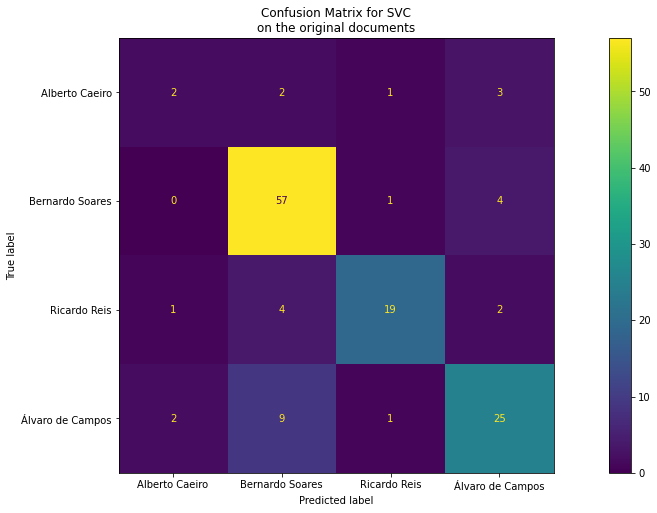

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(20, 8))
ConfusionMatrixDisplay.from_predictions(y_test, predictions_svm, ax=ax)
ax.xaxis.set_ticklabels(['Alberto Caeiro', 'Bernardo Soares', 'Ricardo Reis', 'Álvaro de Campos'])
ax.yaxis.set_ticklabels(['Alberto Caeiro', 'Bernardo Soares', 'Ricardo Reis', 'Álvaro de Campos'])
_ = ax.set_title(
    f"Confusion Matrix for {svm.__class__.__name__}\non the original documents"
)

In [41]:
# Quantidade de poemas e prosas de cada heterônimo do conjunto de teste

pd.Series([dic[pred] for pred in y_test]).value_counts()

Bernardo Soares     62
Álvaro de Campos    37
Ricardo Reis        26
Alberto Caeiro       8
dtype: int64



---



Para visualizar os vetores do tf-idf de cada heterônimo utilizaremos uma técnica chamada PCA. 

**PCA** (*Principal Component Analysis*) é uma técnica de análise multivariada que busca reduzir a dimensionalidade de um conjunto de dados, mantendo o máximo possível de sua variabilidade.




---





In [42]:
from sklearn.decomposition import PCA
import numpy as np

In [43]:
bernardo = fernando_pessoa_pt[fernando_pessoa_pt.autor == 'Bernardo Soares']
ricardo = fernando_pessoa_pt[fernando_pessoa_pt.autor == 'Ricardo Reis']
campos = fernando_pessoa_pt[fernando_pessoa_pt.autor == 'Álvaro de Campos']
alberto = fernando_pessoa_pt[fernando_pessoa_pt.autor == 'Alberto Caeiro']

bernardo_tfidf = tfidf_vector.transform(bernardo.texto_pre_processado)
ricardo_tfidf = tfidf_vector.transform(ricardo.texto_pre_processado)
campos_tfidf = tfidf_vector.transform(campos.texto_pre_processado)
alberto_tfidf = tfidf_vector.transform(alberto.texto_pre_processado)

In [44]:
bernardo_tfidf_2D = PCA(n_components = 2).fit_transform(np.asarray(bernardo_tfidf.todense()))
ricardo_tfidf_2D = PCA(n_components = 2).fit_transform(np.asarray(ricardo_tfidf.todense()))
campos_tfidf_2D = PCA(n_components = 2).fit_transform(np.asarray(campos_tfidf.todense()))
alberto_tfidf_2D = PCA(n_components = 2).fit_transform(np.asarray(alberto_tfidf.todense()))

<function matplotlib.pyplot.show(close=None, block=None)>

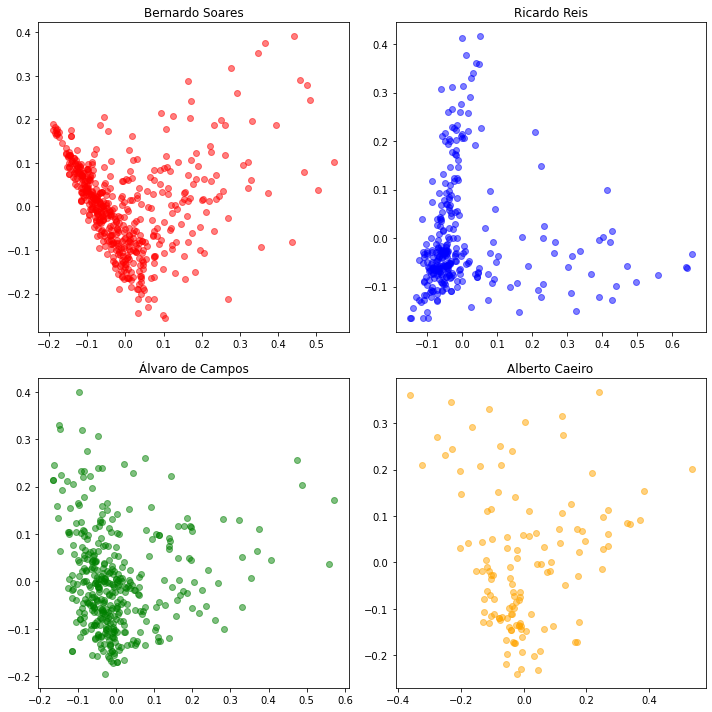

In [46]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# plotando os dados em cada subplot
axs[0, 0].scatter(bernardo_tfidf_2D[:, 0], bernardo_tfidf_2D[:, 1], c='red', alpha=0.5)
axs[0, 0].set_title('Bernardo Soares')

axs[0, 1].scatter(ricardo_tfidf_2D[:, 0], ricardo_tfidf_2D[:, 1], c='blue', alpha=0.5)
axs[0, 1].set_title('Ricardo Reis')

axs[1, 0].scatter(campos_tfidf_2D[:, 0], campos_tfidf_2D[:, 1], c='green', alpha=0.5)
axs[1, 0].set_title('Álvaro de Campos')

axs[1, 1].scatter(alberto_tfidf_2D[:, 0], alberto_tfidf_2D[:, 1], c='orange', alpha=0.5)
axs[1, 1].set_title('Alberto Caeiro')

plt.tight_layout()
plt.show

In [47]:
fernando_pessoa_pt.to_csv('/content/drive/MyDrive/Colab Notebooks/fernando_pessoa_pt.csv')

**Créditos:**  mais do que merecidos ao grupo Turing-USP

[sigam o Turing Talks no Medium 🤗](https://medium.com/turing-talks)

<center>

# Muito obrigada e até mais!



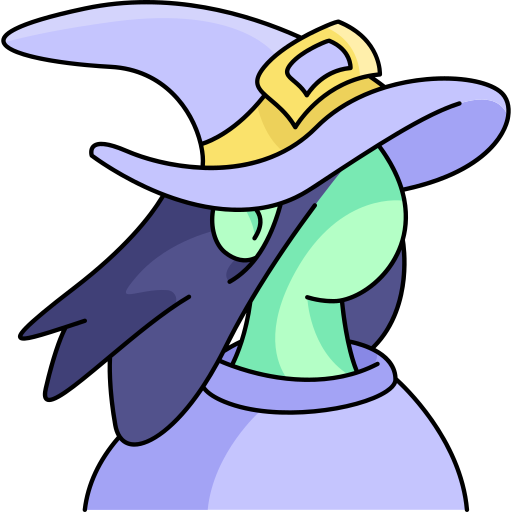

</center>